In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Carga y limpieza de datos

In [4]:
df = pd.read_csv("Reviews.csv")

In [5]:
df["Time"] = pd.to_datetime(df["Time"], unit="s")

In [6]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      568454 non-null  int64         
 1   ProductId               568454 non-null  object        
 2   UserId                  568454 non-null  object        
 3   ProfileName             568428 non-null  object        
 4   HelpfulnessNumerator    568454 non-null  int64         
 5   HelpfulnessDenominator  568454 non-null  int64         
 6   Score                   568454 non-null  int64         
 7   Time                    568454 non-null  datetime64[ns]
 8   Summary                 568427 non-null  object        
 9   Text                    568454 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 43.4+ MB


In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Id,568454.0,NaN,NaN,NaN,284227.5,1.0,142114.25,284227.5,426340.75,568454.0,164098.679298
ProductId,568454,74258,B007JFMH8M,913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UserId,568454,256059,A3OXHLG6DIBRW8,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProfileName,568428,218415,"C. F. Hill ""CFH""",451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HelpfulnessNumerator,568454.0,NaN,NaN,NaN,1.743817,0.0,0.0,0.0,2.0,866.0,7.636513
HelpfulnessDenominator,568454.0,NaN,NaN,NaN,2.22881,0.0,0.0,1.0,2.0,923.0,8.28974
Score,568454.0,NaN,NaN,NaN,4.183199,1.0,4.0,5.0,5.0,5.0,1.310436
Time,568454,NaN,NaN,NaN,2011-01-28 23:16:44.902419712,1999-10-08 00:00:00,2010-04-15 00:00:00,2011-07-20 00:00:00,2012-03-26 00:00:00,2012-10-26 00:00:00,NaN
Summary,568427,295742,Delicious!,2462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Text,568454,393579,"This review will make me sound really stupid, ...",199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print("Número de filas del df: ", df.shape[0])
print("Número de columnas del df: ", df.shape[1])

Número de filas del df:  568454
Número de columnas del df:  10


In [11]:
df = df[df["HelpfulnessNumerator"] <= df["HelpfulnessDenominator"]]

In [12]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


# Distribución básica

Distribución de scores

C:\Users\jesus\AppData\Local\Temp\ipykernel_22612\3531730883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Score", data=df, palette="viridis", order=sorted(df["Score"].unique()))


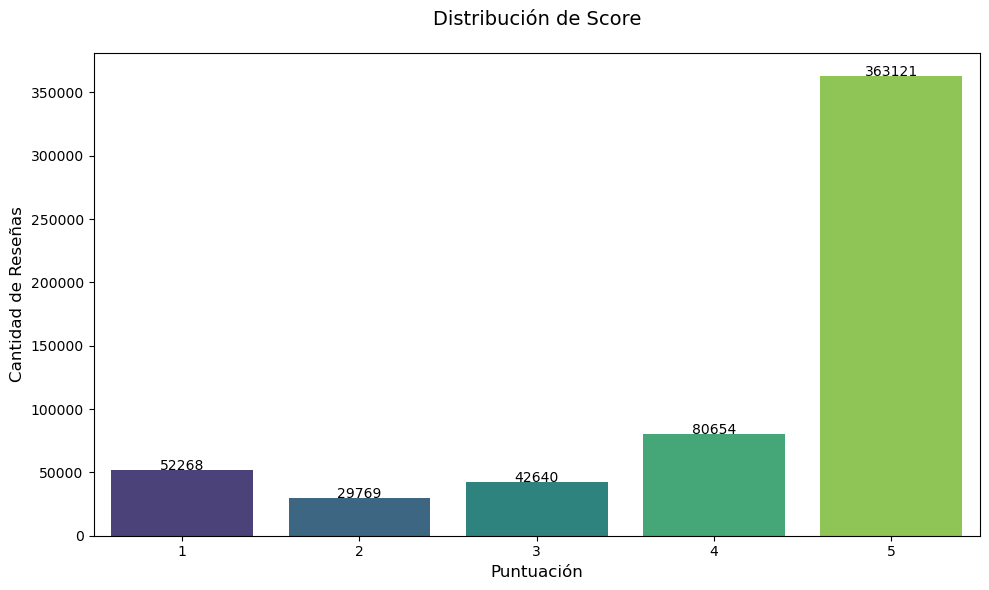

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Score", data=df, palette="viridis", order=sorted(df["Score"].unique()))

plt.title("Distribución de Score", fontsize=14, pad=20)
plt.xlabel("Puntuación", fontsize=12)
plt.ylabel("Cantidad de Reseñas", fontsize=12)

plt.yticks(fontsize=10)
ax.yaxis.set_major_formatter(plt.FormatStrFormatter("%.0f"))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

In [14]:
df["Score"].value_counts()

Score
5    363121
4     80654
1     52268
3     42640
2     29769
Name: count, dtype: int64

Distribución básica de Helpfulness Ratio

C:\Users\jesus\AppData\Local\Temp\ipykernel_22612\900212854.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


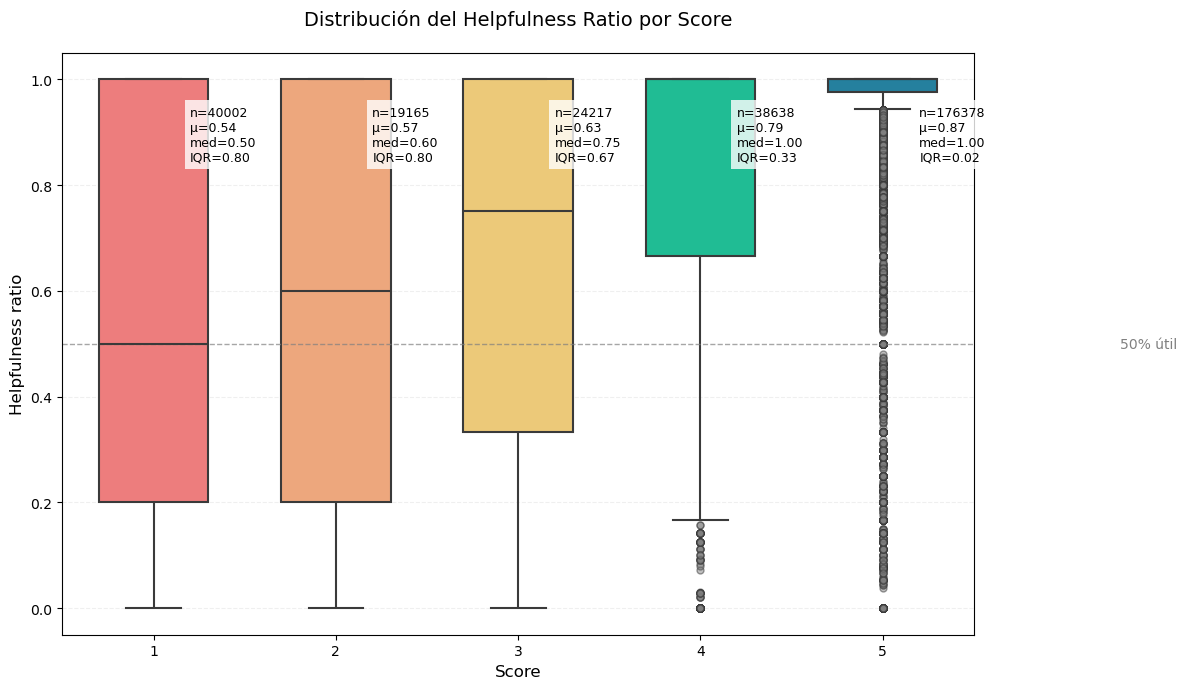

In [15]:
df["Helpfulness ratio"] = np.where(
    df["HelpfulnessDenominator"] > 0,
    df["HelpfulnessNumerator"] / df["HelpfulnessDenominator"],
    np.nan
)

In [ ]:
valid_data = df.dropna(subset=["Helpfulness ratio"])

In [ ]:
stats = valid_data.groupby("Score")["Helpfulness ratio"].agg([
    ("Count", "count"),
    ("Mean", "mean"),
    ("Median", "median"),
    ("Std Dev", "std"),
    ("Q1", lambda x: x.quantile(0.25)),
    ("Q3", lambda x: x.quantile(0.75)),
    ("IQR", lambda x: x.quantile(0.75) - x.quantile(0.25)),
    ("Min", "min"),
    ("Max", "max")
]).round(3)

In [ ]:
plt.figure(figsize=(12, 7))

boxplot = sns.boxplot(
    x="Score", 
    y="Helpfulness ratio", 
    data=df.dropna(subset=["Helpfulness ratio"]),
    palette=["#FF6B6B", "#FFA36B", "#FFD166", "#06D6A0", "#118AB2"],
    width=0.6,
    linewidth=1.5,
    flierprops={"marker": "o", "markersize": 5, "markerfacecolor": "gray", "alpha": 0.5}
)

plt.title("Distribución del Helpfulness Ratio por Score", 
          fontsize=14, pad=20)
plt.xlabel("Score", fontsize=12)
plt.ylabel("Helpfulness ratio", fontsize=12)
plt.grid(axis="y", alpha=0.2, linestyle="--")

plt.axhline(y=0.5, color="gray", linestyle="--", alpha=0.7, linewidth=1)
plt.text(5.3, 0.5, "50% útil", va="center", ha="left", color="gray", fontsize=10)


plt.ylim(-0.05, 1.05)

medians = df.groupby("Score")["Helpfulness ratio"].median()
for i, score in enumerate(stats.index):
    text = (f"n={stats.loc[score, "Count"]}\n"
            f"μ={stats.loc[score, "Mean"]:.2f}\n"
            f"med={stats.loc[score, "Median"]:.2f}\n"
            f"IQR={stats.loc[score, "IQR"]:.2f}")
    boxplot.text(i+0.2, 0.95, text, 
            ha="left", va="top", 
            bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"),
            fontsize=9)

plt.tight_layout()
plt.show()

# Analisis temporal

Tendencia temporal de ratings

In [16]:
df["Time"] = pd.to_datetime(df["Time"], unit="s")
df["Year"] = df["Time"].dt.year
df["Month"] = df["Time"].dt.month

monthly_ratings = df.groupby(["Year", "Month"])["Score"].value_counts(normalize=True).unstack() * 100
monthly_ratings = monthly_ratings.reset_index()

monthly_ratings["Year-Month"] = monthly_ratings["Year"].astype(str) + "-" + monthly_ratings["Month"].astype(str).str.pad(2, fillchar="0")

NameError: name 'colors' is not defined

<Figure size 1400x700 with 0 Axes>

In [ ]:
plt.figure(figsize=(14, 7))

for score, color in zip([1, 2, 3, 4, 5], colors):
    plt.plot(monthly_ratings["Year-Month"], 
             monthly_ratings[score],  
             label=f'{score} estrella{"s" if score > 1 else ""}')

plt.title("Evolución de Ratings por Mes", fontsize=16)
plt.xlabel("Mes")
plt.ylabel("Porcentaje de Ratings (%)")

n = len(monthly_ratings)
plt.xticks(range(0, n, 3), monthly_ratings["Year-Month"][::3], rotation=45)

plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Analisis temporal de la actividad

In [ ]:
df["Time"] = pd.to_datetime(df["Time"], unit="s")
df["Year"] = df["Time"].dt.year
df["Month"] = df["Time"].dt.month

df["Year-Month"] = df["Year"].astype(str) + "-" + df["Month"].astype(str).str.pad(2, fillchar="0")
monthly_activity = df["Year-Month"].value_counts().sort_index()

In [ ]:
plt.figure(figsize=(14, 7))
plt.style.use("seaborn-v0_8-whitegrid")

plt.plot(monthly_activity.index, 
         monthly_activity.values,
         markersize=8,
         linewidth=2.5,
         color="#4C72B0")

plt.title("Actividad Mensual de Ratings", fontsize=16, pad=20)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Número Total de Ratings", fontsize=12)

n_months = len(monthly_activity)
skip = max(1, n_months // 10)  
plt.xticks(range(0, n_months, skip), 
          monthly_activity.index[::skip], 
          rotation=45, ha="right")

plt.grid(True, linestyle=":", alpha=0.6)


plt.tight_layout()
plt.show()

# Análisis de productos

Número de productos que aparecen en el dataset

In [35]:
total_productos = df['ProductId'].nunique()
print("El dataset contiene ", total_productos, " productos distintos")

El dataset contiene  74257  productos distintos


Top 10 productos mas reseñados

In [ ]:
top_products = df["ProductId"].value_counts().head(10)

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_products.values, 
                 y=top_products.index,)  

plt.title("Top 10 productos con más Reseñas", fontsize=14)
plt.xlabel("Número de Reseñas")
plt.ylabel("Product Id")

for value in ax.containers[0]:  
    width = value.get_width()
    ax.text(width / 2,                    
            value.get_y() + value.get_height()/2,  
            f"{int(width)}",            
            ha="center", 
            va="center",
            color="white",
            fontsize=10)

sns.despine() 
plt.tight_layout()
plt.show()

In [ ]:
reviews_count = df.groupby("ProductId").size().reset_index(name="ReviewCount")
avg_score = df.groupby("ProductId")["Score"].mean().reset_index(name="AvgScore")
product_stats = pd.merge(reviews_count, avg_score, on="ProductId")
top_10 = product_stats.sort_values("ReviewCount", ascending=False)
top_10.head(10)

Polaridad de los productos

In [ ]:
df_extremas = df[df["Score"].isin([1, 5])]
porcentaje_extremas = (len(df_extremas) / len(df)) * 100
procentajes_no_extremos = 100 - porcentaje_extremas
productos_polarizados = df.groupby("ProductId")["Score"].agg(lambda x: all(x.isin([1, 5]))).reset_index()
productos_polarizados = productos_polarizados[productos_polarizados["Score"] == True]

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie([porcentaje_extremas, procentajes_no_extremos],
    labels=["Reseñas extremas", "Reseñas no extremas"],
    autopct="%1.1f%%",
    colors=["#ff9999","#66b3ff"]),
plt.title("Distribución de Polaridad Extrema")
plt.show()

In [ ]:
polarization_index = df.groupby("ProductId")["Score"].agg(
    total_reviews = "count",
    pct_1star = lambda x: (x==1).mean() * 100,
    pct_5star = lambda x: (x==5).mean() * 100,
    polarization_score = lambda x: ((x==1).mean() + (x==5).mean()) * 100
).reset_index()

polarization_index.head()

In [ ]:
polarization_index['tipo_polarizacion'] = polarization_index.apply(
    lambda row: "Positiva" if row["pct_5star"] > 70 else
                "Negativa" if row["pct_1star"] > 70 else
                "Mixta", axis=1
)

In [ ]:
polarization_summary = polarization_index.groupby("tipo_polarizacion").agg(
    num_productos = ("ProductId", "count"),
    avg_polarization = ("polarization_score", "mean"),
    avg_reviews = ("total_reviews", "mean")
).reset_index()

display(polarization_summary)

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=polarization_summary,
    x="tipo_polarizacion",
    y="avg_polarization",
    hue="tipo_polarizacion",
    palette={"Positiva": "green", "Negativa": "red", "Mixta": "orange"}
)

plt.title("Top 20 Productos Más Polarizados", fontsize=14)
plt.xlabel("ID de Producto")
plt.ylabel("Puntuación de Polarización (%)")


for index, row in polarization_summary.iterrows():
    plt.text(
        index, 
        row["avg_polarization"] + 1, 
        f"{row["avg_polarization"]:.1f}%",
        ha="center",
        va="bottom"
    )
    
plt.xticks(rotation=45)
plt.show()

Consistencia de productos (productos que solo valoraciones de 1 estrella o productos que tienen solo 5 estrellas)

In [ ]:
productos_solo_score1 = (
    df.groupby("ProductId")
    .agg(
        Todas_son_1=("Score", lambda x: (x == 1).all()),  
        Num_reseñas=("Score", "count")                    
    )
    .reset_index()
    .query("Todas_son_1 == True")  
)

In [ ]:
print(len(productos_solo_score1))
topscore1 = productos_solo_score1.sort_values("Num_reseñas", ascending=False)
topscore1.head()

In [ ]:
productos_solo_score5 = (
    df.groupby("ProductId")
    .agg(
        Todas_son_5=("Score", lambda x: (x == 5).all()),  
        Num_reseñas=("Score", "count")                    
    )
    .reset_index()
    .query("Todas_son_5 == True")  
)

In [ ]:
print(len(productos_solo_score5))
topscore5 = productos_solo_score5.sort_values("Num_reseñas", ascending=False)
topscore5.head()

# Análisis de usuarios

Total de usuarios en el dataset

In [33]:
total_usuarios = df["ProfileName"].nunique()
print("El dataset contiene ", total_usuarios, " usuarios únicos")

El dataset contiene  218415  usuarios únicos


Usuarios que solo han valorado una vez

In [ ]:
conteo_resenas_por_usuario = df.groupby("UserId").size().reset_index(name="Num_reseñas")
usuarios_con_una_resena = conteo_resenas_por_usuario[conteo_resenas_por_usuario["Num_reseñas"] == 1]
total_usuarios_una_resena = len(usuarios_con_una_resena)
print("Numero de usuarios con una reseña: ", total_usuarios_una_resena)

In [ ]:
total_usuarios = len(df["UserId"].unique())
porcentaje = (total_usuarios_una_resena / total_usuarios) * 100
print("Porcentaje de usuarios con una reseña respecto al total de usuarios: ", porcentaje, "%")

Usuarios que han dado score de 5 siempre

In [ ]:
usuarios_exclusivo_score5 = (
    df.groupby("UserId")
    .agg(
        Solo_5estrellas=("Score", lambda x: (x == 5).all()),
    )
    .reset_index()
)

usuarios_exclusivo_score5 = usuarios_exclusivo_score5[usuarios_exclusivo_score5["Solo_5estrellas"]]
print("Porcentaje de usuarios que dieron siempre un score de 5: ", len(usuarios_exclusivo_5estrellas)/len(df["UserId"].unique())*100, "%")

Usuarios que han dado score de 1 siempre

In [ ]:
usuarios_exclusivo_score1 = (
    df.groupby("UserId")
    .agg(
        Solo_score1=("Score", lambda x: (x == 1).all()),
    )
    .reset_index()
)

usuarios_exclusivo_score1 = usuarios_exclusivo_score1[usuarios_exclusivo_score1["Solo_1estrella"]]
print(len(usuarios_exclusivo_score1)/len(df["UserId"].unique())*100)

Usuarios que han hecho mas reseñas

In [ ]:
reviews_count = df.groupby("ProfileName").size().reset_index(name="ReviewCount")
avg_score = df.groupby("ProfileName")["Score"].mean().reset_index(name="AvgScore")
ProfileName_stats = pd.merge(reviews_count, avg_score, on="ProfileName")
top_10 = ProfileName_stats.sort_values("ReviewCount", ascending=False)
top_10.head(10)

In [ ]:
top_users = df["ProfileName"].value_counts().head(10)

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_users.values, 
                 y=top_users.index,)  

plt.title("Top 10 Usuarios con más Reseñas", fontsize=14)
plt.xlabel("Número de Reseñas")
plt.ylabel("Profile name")

for value in ax.containers[0]:  
    width = value.get_width()
    ax.text(width / 2,                    
            value.get_y() + value.get_height()/2,  
            f"{int(width)}",            
            ha="center", 
            va="center",
            color="white",
            fontsize=10)

sns.despine() 
plt.tight_layout()
plt.show()

Usuarios que no hacen reseñas utiles (helpfulnessnumerator = 0)

In [41]:
df = df[df["ProfileName"].notna()]
df["ProfileName"] = df["ProfileName"].fillna("anónimo")
usuarios_con_todo_0 = df.groupby("ProfileName")["HelpfulnessNumerator"].apply(lambda x: (x == 0).all())
usuarios_filtrados = usuarios_con_todo_0[usuarios_con_todo_0].index
conteo_reseñas = df[df["ProfileName"].isin(usuarios_filtrados)].groupby("ProfileName").size().reset_index(name="Numero_de_Reseñas")
porcentaje = (num_usuarios_todo_0 / total_usuarios) * 100

print("Total de usuarios con todas sus reseñas con HelpfulnessNumerator == 0: ", len(conteo_reseñas))
print("Porcentaje que representan: ", porcentaje, "%")

Total de usuarios con todas sus reseñas con HelpfulnessNumerator == 0:  97379
Porcentaje que representan:  44.584392097612344 %


Usuarios que son utiles en las reviews (chiripa o experto)

In [44]:
df["ProfileName"] = df["ProfileName"].fillna("anónimo")
total_usuarios = df["ProfileName"].nunique()
usuarios_helpful = df.groupby("ProfileName")["HelpfulnessNumerator"].apply(lambda x: (x >= 1).all())
usuarios_helpful = usuarios_helpful[usuarios_helpful].index
num_usuarios_helpful = len(usuarios_helpful)
porcentaje_helpful = (num_usuarios_helpful / total_usuarios) * 100

print("Usuarios con todas sus reseñas con HelpfulnessNumerator >= 1: ", num_usuarios_helpful)
print("Porcentaje que representan: ", porcentaje_helpful, "%")

Usuarios con todas sus reseñas con HelpfulnessNumerator >= 1: 89594
Porcentaje que representan:  41.0200764599501 %


In [47]:
df["ProfileName"] = df["ProfileName"].fillna("anónimo")
total_usuarios = df['ProfileName'].nunique()
usuarios_helpful = df.groupby('ProfileName')['HelpfulnessNumerator'].apply(lambda x: (x >= 10).all())
usuarios_helpful = usuarios_helpful[usuarios_helpful].index
num_usuarios_helpful = len(usuarios_helpful)
porcentaje_helpful = (num_usuarios_helpful / total_usuarios) * 100

print("Usuarios con todas sus reseñas con HelpfulnessNumerator >= 10", num_usuarios_helpful)
print("Porcentaje que representan: ", porcentaje_helpful, "%")

Usuarios con todas sus reseñas con HelpfulnessNumerator >= 1 y que tienen 10 o mas reseñas:  5321
Porcentaje que representan:  2.436187990751551 %


Credibilidad de los super validadores (busqueda de la validación de la reseña facil)

In [50]:
df["HelpfulnessRatio"] = df["HelpfulnessNumerator"] / df["HelpfulnessDenominator"]
df["HelpfulnessRatio"] = df["HelpfulnessRatio"].fillna(0)

reseñas_super_validadores = df[df["ProfileName"].isin(usuarios_helpful)]
helpfulness_por_producto = reseñas_super_validadores.groupby("ProductId")["HelpfulnessRatio"].mean().reset_index()

print(helpfulness_por_producto)

       ProductId  HelpfulnessRatio
0     0006641040          0.986111
1     7310172001          1.000000
2     7310172101          1.000000
3     B00002Z754          1.000000
4     B00004CI84          0.882759
...          ...               ...
4142  B009K2BBT8          0.987116
4143  B009M2LPHO          1.000000
4144  B009M2LUEW          1.000000
4145  B009QEBGIQ          0.882353
4146  B009RB4GO4          0.866667

[4147 rows x 2 columns]


In [48]:
productos_con_ranking = helpfulness_por_producto["ProductId"].unique()
reseñas_en_productos_rankeados = reseñas_super_validadores[reseñas_super_validadores["ProductId"].isin(productos_con_ranking)]
total_reseñas = len(reseñas_en_productos_rankeados)

print("Total de reseñas hechas por super validadores en esos productos que nos dicen como de creible es la capacidad de reseñar: ", total_reseñas)

Total de reseñas hechas por super validadores en esos productos que nos dicen como de creible es la capacidad de reseñar:  7747


Los anteriores supervalidadores eran un poco light, vamos a ver hasta cuando arriesgan su credibidad

In [51]:
usuarios_helpful = df.groupby("ProfileName")["HelpfulnessNumerator"].agg([
    ("todas_mayor_igual_10", lambda x: (x >= 10).all()),
    ("num_reseñas", "count")
])

supervalidadores = usuarios_helpful[
    (usuarios_helpful["todas_mayor_igual_10"]) &
    (usuarios_helpful["num_reseñas"] > 10)
].index

reseñas_supervalidadores = df[df["ProfileName"].isin(supervalidadores)]


print("Cantidad de supervalidadores con más de 10 reseñas: ",len(supervalidadores))
print("Cantidad total de reseñas que hicieron: ", len(reseñas_supervalidadores))

Cantidad de supervalidadores con más de 3 reseñas: 24
Cantidad total de reseñas que hicieron: 369
Ejemplos de supervalidadores:


Usuarios arriesgados reseñando

In [25]:
df["HelpfulnessRatio"] = df["HelpfulnessNumerator"] / df["HelpfulnessDenominator"]
df["HelpfulnessRatio"] = df["HelpfulnessRatio"].fillna(0)

Número de usuarios que tienen todas sus reseñas con HelpfulnessNumerator ≥ 1 y reseñan productos con ratio bajo: 2986
Ejemplos de usuarios:
['Brian A. Lee' 'Silvy' 'Mommy with an Opinion' 'J. arroyo "GOLF NUT"'
 'Julie Sisk' 'D. Boucher' 'Nedrum "nedrum"' 'LINDA K. RINGLE'
 'Nancy E. Ankrom' 'Nick L. Flores']


In [ ]:
usuarios_validos = df.groupby("ProfileName")["HelpfulnessNumerator"].apply(lambda x: (x >= 1).all())
usuarios_validos = usuarios_validos[usuarios_validos].index

In [ ]:
producto_helpfulness = df.groupby("ProductId")["HelpfulnessRatio"].mean()

In [ ]:
productos_bajo_valor = producto_helpfulness[producto_helpfulness <= 0.2].index

In [ ]:
df_validos = df[df["ProfileName"].isin(usuarios_validos)]
df_usuarios_en_productos_bajos = df_validos[df_validos["ProductId"].isin(productos_bajo_valor)]

In [ ]:
usuarios_objetivo = df_usuarios_en_productos_bajos["ProfileName"].unique()

In [ ]:
print("Número de usuarios que tienen todas sus reseñas con HelpfulnessNumerator ≥ 1 y reseñan productos con ratio bajo: ", len(usuarios_objetivo))

Indice de odio repentino al producto

In [ ]:
def odio_repentino_al_producto(df, min_time_between=30, sample_size=None):
    if sample_size:
        df = df.sample(sample_size)
    
    df_sorted = df.sort_values(["UserId", "ProductId", "Time"])
    changed_users = []
    grouped = df_sorted.groupby(["UserId", "ProductId"])
    
    for (user_id, product_id), group in grouped:
        if len(group) < 2:
            continue 
            
        group = group.sort_values("Time")   
        group["days_since_last"] = (group["Time"] - group["Time"].shift(1)).dt.days
        
        for i in range(1, len(group)):
            prev_score = group.iloc[i-1]["Score"]
            current_score = group.iloc[i]["Score"]
            days_between = group.iloc[i]["days_since_last"]
            
            if prev_score == 5 and current_score == 1 and days_between >= min_time_between:
                changed_users.append({
                    "UserId": user_id,
                    "ProductId": product_id,
                    "FirstReviewTime": group.iloc[i-1]["Time"],
                    "LastReviewTime": group.iloc[i]["Time"],
                    "DaysBetween": days_between,
                    "FirstReviewText": group.iloc[i-1]["Text"],
                    "LastReviewText": group.iloc[i]["Text"],
                    "FirstReviewId": group.iloc[i-1]["Id"],
                    "LastReviewId": group.iloc[i]["Id"]
                })
    
    return pd.DataFrame(changed_users)

In [ ]:
odio_repentino_casos = odio_repentino_al_producto(df, min_time_between=30)
print("Se encontraron", len(odio_repentino_casos), " casos de odio repentino")

In [ ]:
if not odio_repentino_casos.empty:
    print("\nEjemplos de casos encontrados:")
    display(odio_repentino_casos.head())

In [ ]:
def analizar_odio_repentino(cases_df, original_df):
    if cases_df.empty:
        print("No se encontraron casos de odio repentino")
        return
        
    avg_days_between = cases_df["DaysBetween"].mean()
    print("\nPromedio de días entre reseña positiva y negativa:", avg_days_between, "días")
    
    top_products = cases_df["ProductId"].value_counts().head(10)
    print("\nProductos con más casos de odio repentino:")
    print(top_products)
    
    cases_df["text_length_diff"] = cases_df.apply(
        lambda x: len(x["LastReviewText"]) - len(x["FirstReviewText"]), axis=1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    cases_df["DaysBetween"].hist(bins=30)
    plt.title("Distribución de días entre reseñas")
    plt.xlabel("Días")
    
    plt.subplot(1, 2, 2)
    cases_df["text_length_diff"].hist(bins=30)
    plt.title("Diferencia en longitud de texto")
    plt.xlabel("Caracteres (negativa - positiva)")
    plt.tight_layout()
    plt.show()
    
    sample_case = cases_df.iloc[0]
    print("\nEjemplo detallado de un caso:")
    print("Usuario: ", sample_case['UserId'])
    print("Producto: ", sample_case['ProductId'])
    print("Tiempo entre reseñas: ", {ample_case['DaysBetween'], "días")
    print("\nPrimera reseña (5 estrellas):")
    print(sample_case['FirstReviewText'])
    print("\nSegunda reseña (1 estrella):")
    print(sample_case['LastReviewText'])

analizar_odio_repentino(sudden_hate_cases, df)

In [ ]:
'''def plot_user_rating_trajectory(user_id, product_id, df):
    user_reviews = df[(df["UserId"] == user_id) & 
                      (df["ProductId"] == product_id)].sort_values("Time")
    
    if len(user_reviews) < 2:
        print("El usuario solo tiene una reseña para este producto")
        return
    
    plt.figure(figsize=(10, 5))
    plt.plot(user_reviews["Time"], user_reviews["Score"], "o-", markersize=8)
    plt.title(f"Trayectoria de ratings para usuario {user_id} y producto {product_id}")
    plt.xlabel("Fecha")
    plt.ylabel("Rating (1-5)")
    plt.yticks([1, 2, 3, 4, 5])
    plt.grid(True)
    
    for i in range(len(user_reviews)):
        plt.annotate(f"{user_reviews.iloc[i]['Score']}", 
                    (user_reviews.iloc[i]['Time'], user_reviews.iloc[i]['Score']),
                    textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.show()

if not sudden_hate_cases.empty:
    example_user = sudden_hate_cases.iloc[0]['UserId']
    example_product = sudden_hate_cases.iloc[0]['ProductId']
    plot_user_rating_trajectory(example_user, example_product, df)'''

Efecto de la primera reseña en las ventas del producto

In [ ]:
first_reviews = df.sort_values("Time").groupby("ProductId").first().reset_index()

In [ ]:
first_reviews["FirstReviewType"] = pd.cut(first_reviews["Score"], bins=[0, 2, 3, 5], labels=["Negativa (1 y 2)", "Neutral (3)", "Positiva (4 y 5)"], right=False)

In [ ]:
df_with_first_type = pd.merge(df, first_reviews[['ProductId', 'FirstReviewType']], on='ProductId')

In [ ]:
def analyze_first_review_effect(df_with_first_type):

    product_stats = df_with_first_type.groupby(["ProductId", "FirstReviewType"]).agg(
        total_reviews=("Score", "size"),
        avg_score=("Score", "mean"),
        time_span=("Time", lambda x: (x.max() - x.min()).days)
    ).reset_index()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=product_stats, x="FirstReviewType", y="total_reviews", showfliers=False)
    plt.title("Distribución del Número Total de Reseñas por Tipo de Primera Reseña")
    plt.xlabel("Tipo de Primera Reseña")
    plt.ylabel("Número Total de Reseñas")
    plt.show()
    
    plt.figure(figsize=(12, 6))
    for review_type in ["Negativa (1-2)", "Neutral (3)", "Positiva (4-5)"]:
        subset = product_stats[product_stats["FirstReviewType"] == review_type]
        sns.ecdfplot(data=subset, x="total_reviews", label=review_type)
    plt.title("Distribución Acumulativa del Número de Reseñas")
    plt.xlabel("Número Total de Reseñas")
    plt.ylabel("Proporción de Productos")
    plt.legend()
    plt.show()
    

    neg = product_stats[product_stats["FirstReviewType"] == "Negativa (1-2)"]["total_reviews"]
    pos = product_stats[product_stats["FirstReviewType"] == "Positiva (4-5)"]["total_reviews"]
    
    t_stat, p_value = stats.mannwhitneyu(neg, pos, alternative="less")
    print("\nResultado del Test Estadístico (Mann-Whitney U):")
    print("Los productos con primera reseña negativa tienen en promedio menos reseñas?)
    print(f"p-value = {p_value:.4f} ({'Sí' if p_value < 0.05 else 'No'} significativo)")
    
    print("\nResumen Estadístico:")
    print(product_stats.groupby("FirstReviewType")["total_reviews"].describe())
    
    return product_stats

In [ ]:
product_stats = analyze_first_review_effect(df_with_first_type)

In [ ]:
def analizar_acumulación_de_reviews(df_f):
    temporal_data = []
    
    for product_id, group in df_with_first_type.groupby("ProductId"):
        first_type = group["FirstReviewType"].iloc[0]
        sorted_reviews = group.sort_values("Time")
        sorted_reviews["cumulative_reviews"] = range(1, len(sorted_reviews)+1)
        sorted_reviews["days_since_first"] = (sorted_reviews["Time"] - sorted_reviews["Time"].min()).dt.days
        temporal_data.append(sorted_reviews[["ProductId", "FirstReviewType", "days_since_first", "cumulative_reviews"]])
    
    temporal_df = pd.concat(temporal_data)
    
    time_points = [0, 7, 30, 90, 180, 365, 730]  
    comparison_data = []
    
    for first_type in ["Negativa (1-2)", "Neutral (3)", "Positiva (4-5)"]:
        subset = temporal_df[temporal_df["FirstReviewType"] == first_type]
        
        for days in time_points:

            temp = subset[subset["days_since_first"] <= days]
            latest_counts = temp.groupby("ProductId")["cumulative_reviews"].last().dropna()
            
            if not latest_counts.empty:
                comparison_data.append({
                    "FirstReviewType": first_type,
                    "DaysSinceFirst": days,
                    "AvgReviews": latest_counts.mean(),
                    "MedianReviews": latest_counts.median(),
                    "NProducts": len(latest_counts)
                })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=comparison_df, x="DaysSinceFirst", y="AvgReviews", 
                 hue="FirstReviewType", style="FirstReviewType", markers=True, dashes=False)
    plt.title("Acumulación Promedio de Reseñas a lo Largo del Tiempo")
    plt.xlabel("Días desde la Primera Reseña")
    plt.ylabel("Número Promedio de Reseñas")
    plt.grid(True)
    plt.show()
    
    return comparison_df

In [ ]:
accumulation_stats = analyze_review_accumulation(df_f)

# Relaciones con la longitud de la reseña

Relación entre el score y la longitud de la reseña

In [ ]:
df["word_count"] = df["Text"].apply(lambda x: len(str(x).split()))
mean_words_by_score = df.groupby("Score")["word_count"].mean().reset_index()

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(x=mean_words_by_score["Score"], height=mean_words_by_score["word_count"], color=["#ff6b6b", "#ffa502", "#feca57", "#1dd1a1", "#2e86de"], edgecolor="black", linewidth=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., 
             height + 0.5,  
             f"{height:.1f}", 
             ha="center", 
             va="bottom",
             fontsize=11,
             fontweight="bold")
    
plt.xlabel("Score", fontsize=12)
plt.ylabel("mean_words", fontsize=12)
plt.title("Promedio de palabras por Rating", fontsize=14, pad=20)
plt.xticks(ticks=[1, 2, 3, 4, 5])

plt.ylim(70, 100)
plt.yticks(range(70, 101, 5))

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Relación entre helpfulness numerator y longitud del texto

In [ ]:
df["Text_length"] = df["Text"].str.len()
df["Length_bin"] = pd.cut(df["Text_length"], bins=20)
mean_helpfulness = df.groupby(["Length_bin", "Score"])["HelpfulnessNumerator"].mean().reset_index()

In [ ]:
sns.scatterplot(
    data=df.sample(1000),
    x="Text_length",
    y="HelpfulnessNumerator",
    hue="Score",
    palette="viridis",
    alpha=0.7
)

plt.title("Relación entre Longitud, Votos Útiles y Puntuación")
plt.show()

In [ ]:
df["Text_length"] = df["Text"].str.len()
zoom_df = df[(df["Text_length"] <= 1000) & (df["HelpfulnessNumerator"] <= 50)]

sns.scatterplot(
    data=zoom_df.sample(1000),
    x="Text_length",
    y="HelpfulnessNumerator",
    hue="Score",
    palette="viridis",
    alpha=0.7
)
plt.title("Relación entre Longitud, Votos Útiles y Puntuación")
plt.show()

# Armagedón de productos

In [ ]:
productos_armagedon = df.groupby("ProductId").filter(lambda x: (x["Score"] == 1).mean() > 0.5)

resumen = df.groupby("ProductId").agg(
    total_resenas=("Score", "count"),
    porcentaje_1_estrella=("Score", lambda x: (x == 1).mean()*100)
).query("porcentaje_1_estrella > 0.5 & total_resenas > 20")

resumen.head()

In [ ]:
proxy = (
    df.groupby("ProductId")
      .size()
      .reset_index(name="ReviewCount")
)

proxy["SalesRank"] = proxy["ReviewCount"] \
    .rank(method="dense", ascending=False) \
    .astype(int)
ventas_df = proxy[["ProductId", "SalesRank"]]

mask = (
    df.groupby("ProductId")["Score"]
      .transform(lambda s: (s == 1).mean())
    > 0.5
)
productos_armagedon = df[mask].copy()

productos_armagedon.head()

In [ ]:
vectorizer = CountVectorizer(stop_words="english", max_features=20)
X = vectorizer.fit_transform(productos_armagedon["Text"])
palabras = vectorizer.get_feature_names_out()

prod_with_rank = (
    productos_armagedon[["ProductId"]]
      .merge(ventas_df, on="ProductId", how="left")
)

df_pal = pd.DataFrame(X.toarray(), columns=palabras)
df_pal["SalesRank"] = prod_with_rank["SalesRank"].values

corrs = df_pal.corr()["SalesRank"].drop("SalesRank")
heatmap_df = corrs.to_frame(name="Correlación")

plt.figure(figsize=(6, 10))
ax = sns.heatmap(
    heatmap_df,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="gray"
)
ax.set_title("Correlación: Presencia de palabra vs. SalesRank")
ax.set_ylabel("")
ax.set_xlabel("Coeficiente de correlación")
plt.tight_layout()
plt.show()

# Busqueda de correlaciones

Helpfulness ratio vs score

In [ ]:
df["HelpfulnessRatio"] = df.apply(
    lambda x: x["HelpfulnessNumerator"]/x["HelpfulnessDenominator"] 
    if x["HelpfulnessDenominator"] > 0 else 0, 
    axis=1
)

In [ ]:
correlacion_pearson = df[["HelpfulnessRatio", "Score"]].corr(method="pearson").iloc[0,1]
print(f"Correlación de Pearson: {correlacion_pearson:.3f}")

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Score", y="HelpfulnessRatio", data=df)
plt.title("Distribución de HelpfulnessRatio por Puntuación")
plt.show()

Correlación entre el numero de reseñas y el rating promedio

In [ ]:
def review_count_vs_rating(df):
    product_stats = df.groupby("ProductId").agg(
        review_count=("Score", "size"),
        avg_score=("Score", "mean"),
        score_std=("Score", "std")
    ).reset_index()
    return product_stats

In [ ]:
product_stats = review_count_vs_rating(df)

In [ ]:
correlation = product_stats['review_count'].corr(product_stats['avg_score'])
print("Correlación entre cantidad de reseñas y rating promedio: ", correlation)

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=product_stats, x='review_count', y='avg_score', alpha=0.6)
plt.title("Relación entre cantidad de reseñas y rating promedio por producto")
plt.xlabel("Cantidad de reseñas")
plt.ylabel("Rating promedio")
plt.grid(True)
plt.show()

# Distribuciones avanzadas

Distribución de Puntuaciones de los productos por Volumen de Reseñas

In [ ]:
df["CountReviews"] = df.groupby("ProductId")["ProductId"].transform("count")

df["ReviewVolume"] = pd.qcut(
    df["CountReviews"],
    q=3,
    labels=["Pocas", "Medianas", "Muchas"],
    duplicates="drop"  
)

In [ ]:
palette = {"Pocas": "#1f77b4", "Medianas": "#ff7f0e", "Muchas": "#2ca02c"}

g = sns.FacetGrid(
    df,
    col="ReviewVolume",
    col_order=["Pocas", "Medianas", "Muchas"],
    height=4,
    aspect=1.5,
    sharey=True
)

g.map_dataframe(
    sns.kdeplot,
    x="Score",
    fill=True,
    lw=2,
    common_norm=False,
    alpha=0.6,
    color=None 
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Puntuación (Score)", "Densidad")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Distribución de Puntuaciones por Volumen de Reseñas", fontsize=16)

sns.despine()
plt.tight_layout()
plt.show()

Analisis de rafagas de reseñas

In [ ]:
def detect_review_bursts(df, time_window="7D", threshold=10):
    bursts = df.groupby(["ProductId", pd.Grouper(key="Time", freq=time_window)])\
               .size()\
               .reset_index(name="count")
    
    suspicious_bursts = bursts[bursts["count"] >= threshold]
    
    return suspicious_bursts.sort_values("count", ascending=False)

In [ ]:
suspicious_bursts = detect_review_bursts(df)
print("Productos con posibles review bombing:")
print(suspicious_bursts.head(10))

In [ ]:
def plot_product_reviews(product_id, df):
    product_reviews = df[df['ProductId'] == product_id].sort_values("Time")
    
    plt.figure(figsize=(12, 6))
    plt.scatter(product_reviews["Time"], product_reviews["Score"], alpha=0.6)
    plt.title("Distribución temporal de reseñas para producto", product_id)
    plt.xlabel("Fecha")
    plt.ylabel("Puntuación (1-5)")
    plt.grid(True)
    plt.show()

In [ ]:
if not suspicious_bursts.empty:
    plot_product_reviews(suspicious_bursts.iloc[0]['ProductId'], df)